<hr>

### Modelado

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Carga de CSVs
train_df = pd.read_csv("../Preprocesamiento/train_preproc.csv",sep=',',encoding='UTF-8')

In [3]:
X = train_df.iloc[:,1:-1]
Y = train_df['Reached.on.Time_Y.N'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

#### Polynomial

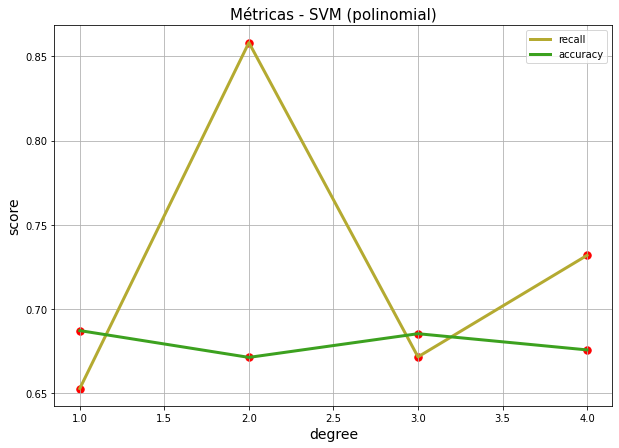

El mayor recall es de:  0.8582004555808656 
Con un grado de orden: 2

La mayor precisión es de:  0.687037037037037 
Con un grado de orden: 1


In [5]:
#Creamos el registro de scores para SVM
degree = []
recall_ = []
accura_ = []
for i in range(1,5):
    #print()
    clf = SVC(kernel='poly', random_state=42,degree=i,C=200)
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)
    degree.append(i)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - SVM (polinomial)', fontsize=15)

plt.plot(profundidad,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(profundidad, recall_,s=55,c='r')

plt.scatter(profundidad, accura_,s=55,c='r')
plt.plot(profundidad,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('degree',fontsize=14)
plt.legend()
plt.grid()
plt.show()

prof_max_recall = 0
prof_max_accur = 0
for i in range(0,len(profundidad)): 
    if recall_[i] ==  np.asarray(recall_).max():
        prof_max_recall = i + 1
    if accura_[i] == np.asarray(accura_).max():
        prof_max_accur = i + 1

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon un grado de orden:', prof_max_recall)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon un grado de orden:', prof_max_accur)

#### Radial basis function

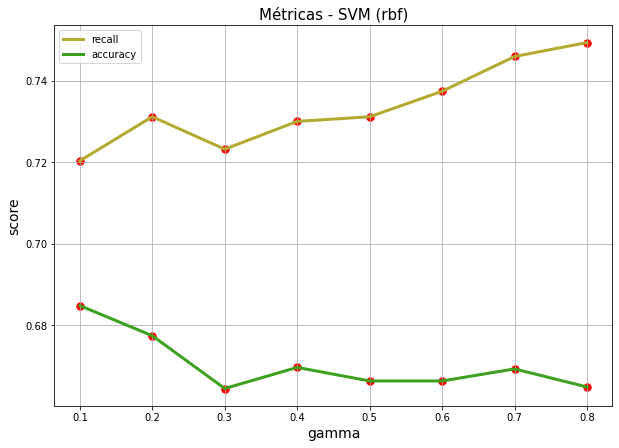

El mayor recall es de:  0.7494305239179955 
Con un gamma de: 0.8

La mayor precisión es de:  0.6848148148148148 
Con un gamma de: 0.1


In [16]:
#Creamos el registro de scores para el árbol de decision
recall_ = []
accura_ = []
gamma = np.arange(0.1,0.9,0.1)
for i in gamma:
    clf = SVC(C= 200, gamma= i, kernel= 'rbf')
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - SVM (rbf)', fontsize=15)

plt.plot(gamma,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(gamma, recall_,s=55,c='r')

plt.scatter(gamma, accura_,s=55,c='r')
plt.plot(gamma,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('gamma',fontsize=14)
plt.legend()
plt.grid()
plt.show()

max_recall = 0.0
max_accur = 0.0
for i in range(0,len(gamma)): 
    if recall_[i] ==  np.asarray(recall_).max():
        max_recall = i + 1
    if accura_[i] == np.asarray(accura_).max():
        max_accur = i + 1

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon un gamma de:', max_recall/10)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon un gamma de:', max_accur/10)

In [13]:
# Hyperparameter search space
search_space = {
    'kernel': ['rbf'],
    'C': [10, 20, 30, 40, 50, 60, 70, 80,90, 100],
    'gamma': [0.1, 0.5, 0.8]
}
svc_ = SVC()
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV #cv: cross validation
# Le pasamos la grilla que creamos
model = GridSearchCV(svc_, param_grid=search_space, cv=5)
# Entrenamos
model.fit(X_train,y_train)
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'C': 40, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor Score: 0.6920134397417955



<hr>

### Conclusión

##### Las mejores configuraciones son:<br><br><font color='#D06EDA'>SVM</font>(kernel='poly', random_state=42,gamma=0.8,C=200)<br><br><font color='#D06EDA'>SVM</font>(kernel='rbf', random_state=42, C=200)